In [192]:
import pandas as pd
import numpy as np
import os
import statsmodels.formula.api as smf
import scipy.stats
import math
import warnings
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates

In [193]:
warnings.filterwarnings('ignore')
infile = '9ofkuwkebi2jixwy.csv'
tba = pd.read_csv(infile)
tba.head(10)

,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,sub_prd_type,trans_dt,msg_seq_nb,trc_st,cmsn_trd,remuneration,ascii_rptd_vol_tx,frmt_cd,rptd_pr,asof_cd,sale_cndtn_cd,sale_cndtn2_cd,spcl_trd_fl,diss_rptg_side_cd,side,chng_cd,rptd_high_pr,rptd_low_pr,rptd_last_pr,orig_dis_dt,orig_msg_seq_nb,function,sttl_dt,factor,rptg_party_type,contra_party_type,ATS_indicator
0,02R050614,FMCC3516075,FMCC,BBG001LK2284,20220104,16:13:06,TBA,20220128,6341,O,NaN,M,25MM+,E,110.476562,A,Z,O,NaN,NaN,S,0,0.000000,0.000000,0.000000,20220104.0,13204.0,N,20220131,0.0,D,C,NaN
1,02R050614,FMCC3516075,FMCC,BBG001LK2284,20220104,16:13:06,TBA,20220104,12506,M,NaN,M,25MM+,E,110.476562,NaN,NaN,NaN,NaN,NaN,S,7,NaN,NaN,NaN,NaN,NaN,NaN,20220131,0.0,D,C,NaN
2,02R050614,FMCC3516075,FMCC,BBG001LK2284,20220104,16:13:06,TBA,20220104,13204,O,NaN,M,25MM+,E,110.476562,NaN,Z,O,NaN,NaN,S,7,110.476562,110.476562,110.476562,20220104.0,12506.0,N,20220131,0.0,D,C,NaN
3,02R062627,FMCC3516513,FMCC,BBG001LJXN78,20220127,15:57:08,TBA,20220228,3509,O,NaN,M,25MM+,E,111.531250,A,Z,O,NaN,NaN,S,0,0.000000,0.000000,0.000000,20220218.0,5209.0,N,20220228,0.0,D,C,NaN
4,02R062627,FMCC3516513,FMCC,BBG001LJXN78,20220127,15:57:08,TBA,20220218,5209,O,NaN,M,25MM+,E,111.531250,A,Z,O,NaN,NaN,S,0,0.000000,0.000000,0.000000,20220127.0,11787.0,N,20220228,0.0,D,C,NaN
5,02R062627,FMCC3516513,FMCC,BBG001LJXN78,20220127,15:57:08,TBA,20220127,11787,M,NaN,M,25MM+,E,111.531250,NaN,NaN,O,NaN,NaN,S,7,NaN,NaN,NaN,NaN,NaN,NaN,20220228,0.0,D,C,NaN
6,02R042660,FMCC3518169,FMCC,BBG001LK62B6,20220623,12:21:00,TBA,20220630,3857,M,NaN,M,2222000,A,99.093750,A,Z,N,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,20220630,0.0,D,C,NaN
7,02R050663,FMCC3518175,FMCC,BBG001LK22H4,20220623,12:17:14,TBA,20220630,3596,M,NaN,M,4751000,A,100.750000,A,Z,N,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,20220630,0.0,D,C,NaN
8,02R042678,FMCC3518589,FMCC,BBG001LK6299,20220614,10:53:56,TBA,20220614,2790,M,NaN,M,2851347,A,99.296875,NaN,NaN,O,NaN,NaN,B,7,NaN,NaN,NaN,NaN,NaN,NaN,20220617,1.0,D,C,NaN
9,02R042678,FMCC3518589,FMCC,BBG001LK6299,20220614,10:53:56,TBA,20220614,2791,M,NaN,M,2022400,A,99.187500,NaN,NaN,O,NaN,NaN,B,3,NaN,NaN,NaN,NaN,NaN,NaN,20220617,1.0,D,C,NaN


In [194]:
tba.tail()

,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,sub_prd_type,trans_dt,msg_seq_nb,trc_st,cmsn_trd,remuneration,ascii_rptd_vol_tx,frmt_cd,rptd_pr,asof_cd,sale_cndtn_cd,sale_cndtn2_cd,spcl_trd_fl,diss_rptg_side_cd,side,chng_cd,rptd_high_pr,rptd_low_pr,rptd_last_pr,orig_dis_dt,orig_msg_seq_nb,function,sttl_dt,factor,rptg_party_type,contra_party_type,ATS_indicator
1982694,01F0104B3,UMBS5218536,UMBS,NaN,20211109,15:15:40,TBA,20211109,9448,M,NaN,M,4532818,A,98.296875,NaN,NaN,N,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,20211116,0.0,D,C,NaN
1982695,01F0104C1,UMBS5218537,UMBS,NaN,20211201,10:21:46,TBA,20211201,1681,M,NaN,M,10000000,A,97.625000,NaN,NaN,NaN,NaN,NaN,S,7,NaN,NaN,NaN,NaN,NaN,NaN,20211216,0.0,D,C,NaN
1982696,01F0104C1,UMBS5218537,UMBS,NaN,20211201,16:21:29,TBA,20211201,10616,M,NaN,M,7500000,A,97.875000,NaN,NaN,NaN,NaN,NaN,S,5,NaN,NaN,NaN,NaN,NaN,NaN,20211216,0.0,D,C,NaN
1982697,01F0104C1,UMBS5218537,UMBS,NaN,20211216,8:08:44,TBA,20211216,298,M,NaN,M,5000000,A,97.906250,NaN,NaN,NaN,NaN,NaN,S,7,NaN,NaN,NaN,NaN,NaN,NaN,20211220,0.0,D,C,NaN
1982698,01F0104C1,UMBS5218537,UMBS,NaN,20211216,8:08:44,TBA,20211216,318,O,NaN,M,5000000,A,97.906250,NaN,NaN,N,NaN,NaN,S,7,0.0,0.0,0.0,20211216.0,298.0,N,20211220,0.0,D,C,NaN


In [195]:
print(tba['company_symbol'].value_counts().to_latex())

\begin{tabular}{lr}
\toprule
{} &  company\_symbol \\
\midrule
UMBS &         1522938 \\
GNMB &          445662 \\
FNMA &            6825 \\
GNMA &            6650 \\
FMCC &             337 \\
SMBA &             287 \\
\bottomrule
\end{tabular}



In [198]:
n_bonds = trace_tba['bond_sym_id'].nunique()
print('Number of bond symbols traded = ',n_bonds)

NameError: name 'trace_tba' is not defined

In [199]:
len(tba)

1982699

In [200]:
print(tba.columns.tolist())

['cusip_id', 'bond_sym_id', 'company_symbol', 'bsym', 'trd_exctn_dt', 'trd_exctn_tm', 'sub_prd_type', 'trans_dt', 'msg_seq_nb', 'trc_st', 'cmsn_trd', 'remuneration', 'ascii_rptd_vol_tx', 'frmt_cd', 'rptd_pr', 'asof_cd', 'sale_cndtn_cd', 'sale_cndtn2_cd', 'spcl_trd_fl', 'diss_rptg_side_cd', 'side', 'chng_cd', 'rptd_high_pr', 'rptd_low_pr', 'rptd_last_pr', 'orig_dis_dt', 'orig_msg_seq_nb', 'function', 'sttl_dt', 'factor', 'rptg_party_type', 'contra_party_type', 'ATS_indicator']


In [201]:
tba['rptd_pr']


0          110.476562
1          110.476562
2          110.476562
3          111.531250
4          111.531250
              ...    
1982694     98.296875
1982695     97.625000
1982696     97.875000
1982697     97.906250
1982698     97.906250
Name: rptd_pr, Length: 1982699, dtype: float64

In [202]:
price_date = tba['trd_exctn_dt']
price_close = tba['rptd_pr']
plt.plot_date(price_date, price_close, linestyle='solid')

ValueError: Date ordinal 20210430.0 converts to 57304-04-12T00:00:00.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

In [203]:
data = pd.read_csv(infile)
data['Date'] = pd.to_datetime(data['trd_exctn_dt'], format="%Y%m%d")
data.sort_values('Date', inplace=True)
price_date = data['Date']

AttributeError: 'Line2D' object has no property 'trendline'

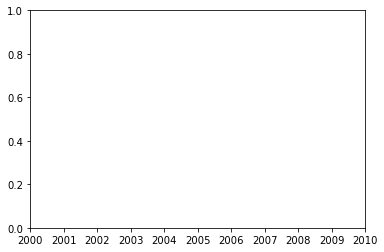

In [204]:
price_close = data['rptd_pr']
plt.plot_date(price_date, price_close, linestyle='solid', trendline='ols')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('TBA Prices')
plt.xlabel('Date')
plt.ylabel('Reported Prices')

plt.show()

In [205]:
price_date.tail()

894340   2022-09-30
894341   2022-09-30
894342   2022-09-30
894328   2022-09-30
913018   2022-09-30
Name: Date, dtype: datetime64[ns]

Text(0, 0.5, 'Reported Prices')

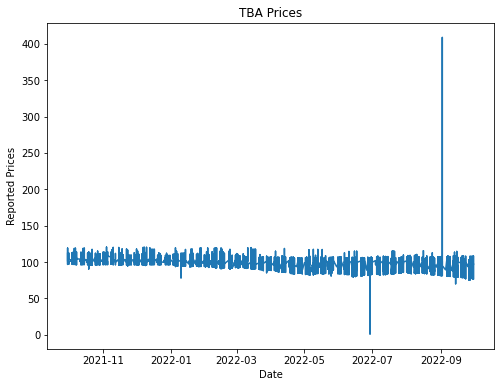

In [266]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(price_date, price_close)
plt.title('TBA Prices')
plt.xlabel('Date')
plt.ylabel('Reported Prices')

In [267]:
df2 = pd.DataFrame().assign(DATE=data['Date'], price=data['rptd_pr'])
print(df2)

              DATE       price
722398  2021-09-30  111.710937
1847005 2021-09-30  100.078125
1847004 2021-09-30  100.074218
1847003 2021-09-30  100.062500
1847002 2021-09-30  100.062500
...            ...         ...
894340  2022-09-30   90.498046
894341  2022-09-30   90.554687
894342  2022-09-30   90.519531
894328  2022-09-30   90.570312
913018  2022-09-30   96.773437

[1982699 rows x 2 columns]


In [268]:
df2.head()

,DATE,price
722398,2021-09-30,111.710937
1847005,2021-09-30,100.078125
1847004,2021-09-30,100.074218
1847003,2021-09-30,100.062500
1847002,2021-09-30,100.062500


In [269]:
cols = df2.columns.difference(['Date'])

In [270]:
df2[cols] = df2[cols].astype(float)

TypeError: Cannot cast DatetimeArray to dtype float64

In [271]:
df = df2.resample('d', on='DATE').mean().dropna(how='all')
print (df)

                 price
DATE                  
2021-09-30  102.434092
2021-10-01  102.507786
2021-10-03  102.292969
2021-10-04  102.520522
2021-10-05  102.535979
...                ...
2022-09-26   94.538463
2022-09-27   93.414480
2022-09-28   94.793450
2022-09-29   93.881533
2022-09-30   93.860982

[293 rows x 1 columns]


In [272]:
df.reset_index(inplace=True)
df.head()

,DATE,price
0,2021-09-30,102.434092
1,2021-10-01,102.507786
2,2021-10-03,102.292969
3,2021-10-04,102.520522
4,2021-10-05,102.535979


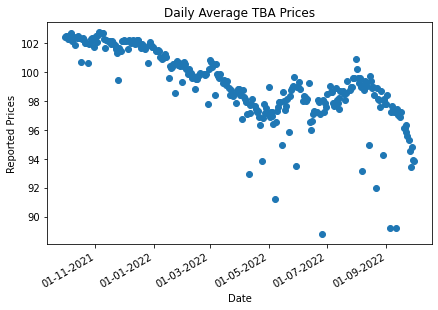

In [273]:
Date = df['DATE']
price = df['price']
plt.plot_date(Date, price)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Daily Average TBA Prices')
plt.xlabel('Date')
plt.ylabel('Reported Prices')



plt.show()

# Looking at Mortgage Interest Rates

In [137]:
warnings.filterwarnings('ignore')
infile = 'MORTGAGE30US.csv'
mtg30 = pd.read_csv(infile)
mtg30.head(10)

,DATE,MORTGAGE30US
0,2021-08-05,2.77
1,2021-08-12,2.87
2,2021-08-19,2.86
3,2021-08-26,2.87
4,2021-09-02,2.87
5,2021-09-09,2.88
6,2021-09-16,2.86
7,2021-09-23,2.88
8,2021-09-30,3.01
9,2021-10-07,2.99


In [138]:
mtg30 = mtg30.drop(mtg30.index[range(3)])

In [139]:

mtg30["DATE"] = pd.to_datetime(mtg30["DATE"])

mtg30.head(10)

,DATE,MORTGAGE30US
3,2021-08-26,2.87
4,2021-09-02,2.87
5,2021-09-09,2.88
6,2021-09-16,2.86
7,2021-09-23,2.88
8,2021-09-30,3.01
9,2021-10-07,2.99
10,2021-10-14,3.05
11,2021-10-21,3.09
12,2021-10-28,3.14


In [140]:
mtg30.tail(10)

,DATE,MORTGAGE30US
57,2022-09-08,5.89
58,2022-09-15,6.02
59,2022-09-22,6.29
60,2022-09-29,6.70
61,2022-10-06,6.66
62,2022-10-13,6.92
63,2022-10-20,6.94
64,2022-10-27,7.08
65,2022-11-03,6.95
66,2022-11-10,7.08


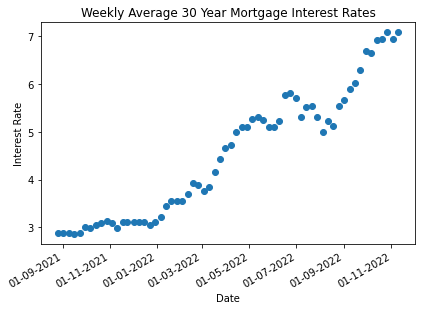

In [173]:
Date = mtg30['DATE']
mtg = mtg30['MORTGAGE30US']
plt.plot_date(Date, mtg)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Weekly Average 30 Year Mortgage Interest Rates')
plt.xlabel('Date')
plt.ylabel('Interest Rate')



plt.show()

In [ ]:
warnings.filterwarnings('ignore')
infile = 'MORTGAGE15US.csv'
mtg15 = pd.read_csv(infile)
mtg15.head(10)

In [ ]:
mtg15 = mtg15.drop(mtg15.index[range(8)])

In [ ]:
mtg15["DATE"] = pd.to_datetime(mtg15["DATE"])
mtg15.head(10)


In [ ]:
Date = mtg15['DATE']
mtg = mtg15['MORTGAGE15US']
plt.plot_date(Date, mtg)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Weekly Average 15 Year Mortgage Interest Rates')
plt.xlabel('Date')
plt.ylabel('Interest Rate')



plt.show()

# Merge

In [174]:
merge30 = pd.merge_asof(df, mtg30)

In [175]:
merge30.head()

,DATE,price,MORTGAGE30US
0,2021-09-30,102.434092,3.01
1,2021-10-01,102.507786,3.01
2,2021-10-03,102.292969,3.01
3,2021-10-04,102.520522,3.01
4,2021-10-05,102.535979,3.01


Text(0.5, 0.98, 'MBS Price vs 30-Year Mortgage Interest Rates')

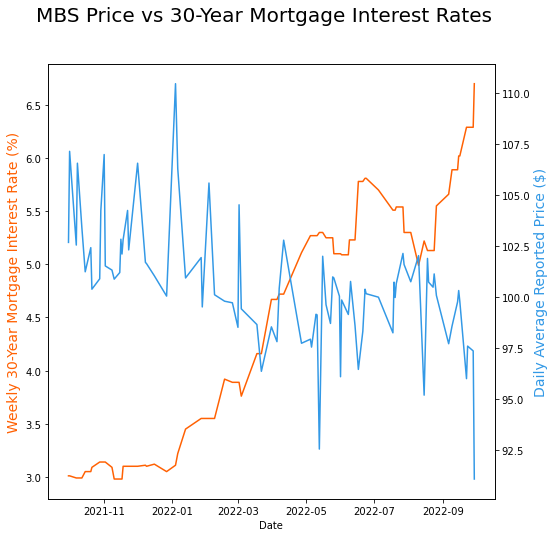

In [105]:
COLOR_INTEREST = "#FF6103"
COLOR_PRICE = "#3399e6"

DATE = merge30['DATE']
price = merge30['price']
MORTGAGE30US = merge30['MORTGAGE30US']
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(DATE, MORTGAGE30US, color=COLOR_INTEREST)
ax2.plot(DATE, price, color=COLOR_PRICE);

ax1.set_xlabel("Date")
ax1.set_ylabel("Weekly 30-Year Mortgage Interest Rate (%)", color=COLOR_INTEREST, fontsize=14)
ax2.set_ylabel("Daily Average Reported Price ($)", color=COLOR_PRICE, fontsize=14)
fig.suptitle("MBS Price vs 30-Year Mortgage Interest Rates", fontsize=20)

In [106]:
merge15 = pd.merge_asof(df, mtg15)
merge15.head()

,DATE,price,MORTGAGE15US
0,2021-09-30,102.695312,2.28
1,2021-10-01,107.160156,2.28
2,2021-10-07,102.564453,2.23
3,2021-10-08,106.578125,2.23
4,2021-10-12,103.414062,2.23


Text(0.5, 0.98, 'MBS Price vs 15-Year Mortgage Interest Rates')

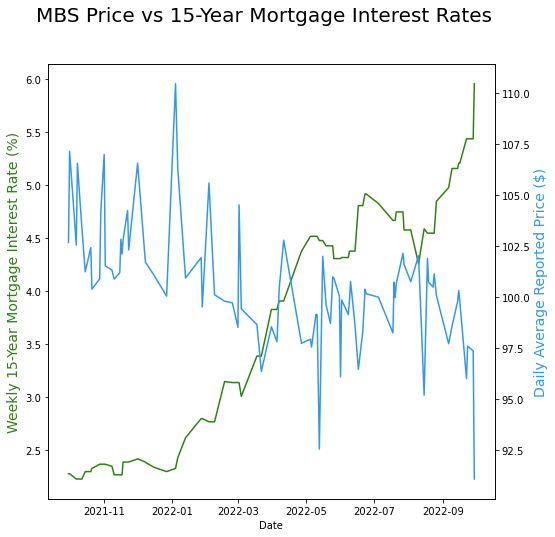

In [107]:
COLOR_INTEREST = "#308014"
COLOR_PRICE = "#3399e6"

DATE = merge15['DATE']
price = merge15['price']
MORTGAGE15US = merge15['MORTGAGE15US']
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(DATE, MORTGAGE15US, color=COLOR_INTEREST)
ax2.plot(DATE, price, color=COLOR_PRICE);



ax1.set_xlabel("Date")
ax1.set_ylabel("Weekly 15-Year Mortgage Interest Rate (%)", color=COLOR_INTEREST, fontsize=14)
ax2.set_ylabel("Daily Average Reported Price ($)", color=COLOR_PRICE, fontsize=14)
fig.suptitle("MBS Price vs 15-Year Mortgage Interest Rates", fontsize=20)

# TBA - Freddie

In [108]:
warnings.filterwarnings('ignore')
infile = '9ofkuwkebi2jixwy.csv'
tba_frm = pd.read_csv(infile)

In [109]:
tba_frm = tba_frm.loc[tba_frm['company_symbol'] == 'FMCC']

In [110]:
data = tba_frm
data['Date'] = pd.to_datetime(data['trd_exctn_dt'], format="%Y%m%d")
data.sort_values('Date', inplace=True)
price_date = data['Date']

In [111]:
price_date.head()

299   2021-09-30
93    2021-10-01
96    2021-10-01
97    2021-10-01
94    2021-10-01
Name: Date, dtype: datetime64[ns]

In [112]:
df2 = pd.DataFrame().assign(DATE=data['Date'], price=data['rptd_pr'])
print(df2)

          DATE       price
299 2021-09-30  102.695312
93  2021-10-01  107.062500
96  2021-10-01  107.164062
97  2021-10-01  107.257812
94  2021-10-01  107.156250
..         ...         ...
140 2022-09-23   98.144531
141 2022-09-23   98.187500
228 2022-09-23   96.937500
210 2022-09-28   97.375000
162 2022-09-29   91.093750

[337 rows x 2 columns]


In [113]:
df2.reset_index(inplace=True)
df2.head()

,index,DATE,price
0,299,2021-09-30,102.695312
1,93,2021-10-01,107.062500
2,96,2021-10-01,107.164062
3,97,2021-10-01,107.257812
4,94,2021-10-01,107.156250


In [114]:
del df2[df2.columns[0]]
df2.head()

,DATE,price
0,2021-09-30,102.695312
1,2021-10-01,107.062500
2,2021-10-01,107.164062
3,2021-10-01,107.257812
4,2021-10-01,107.156250


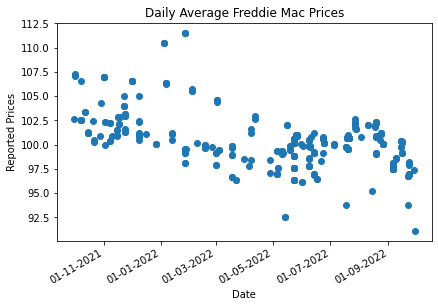

In [115]:
Date = df2['DATE']
price = df2['price']
plt.plot_date(Date, price)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Daily Average Freddie Mac Prices')
plt.xlabel('Date')
plt.ylabel('Reported Prices')



plt.show()

# TBA - Fannie Mae

           DATE      price
2250 2021-09-30  101.06250
459  2021-09-30  100.03125
1071 2021-09-30  102.12500
1070 2021-09-30  101.62500
458  2021-09-30  100.00000
...         ...        ...
7031 2022-09-30  100.00000
7032 2022-09-30  100.06250
7039 2022-09-30  100.25000
4884 2022-09-30  100.00000
4908 2022-09-30  100.00000

[6825 rows x 2 columns]


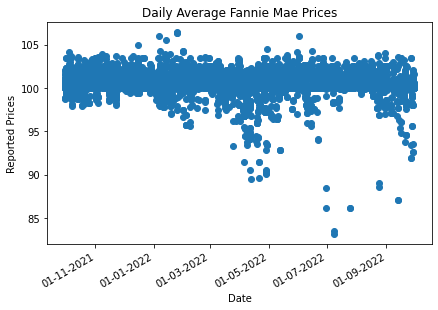

In [116]:
warnings.filterwarnings('ignore')
infile = '9ofkuwkebi2jixwy.csv'
tba_fan = pd.read_csv(infile)
data = tba_fan.loc[tba_fan['company_symbol'] == 'FNMA']


#data = tba_fan
data['Date'] = pd.to_datetime(data['trd_exctn_dt'], format="%Y%m%d")
data.sort_values('Date', inplace=True)
price_date = data['Date']

df_fn = pd.DataFrame().assign(DATE=data['Date'], price=data['rptd_pr'])
print(df_fn)

df_fn.reset_index(inplace=True)
df_fn.head()

del df_fn[df_fn.columns[0]]
df_fn.head()

Date = df_fn['DATE']
price = df_fn['price']
plt.plot_date(Date, price)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Daily Average Fannie Mae Prices')
plt.xlabel('Date')
plt.ylabel('Reported Prices')



plt.show()

In [117]:
warnings.filterwarnings('ignore')
infile = '9ofkuwkebi2jixwy.csv'
tba_fan = pd.read_csv(infile)


In [118]:
tba_fan = tba_fan.loc[tba_fan['company_symbol'] == 'FNMA']

#  Fannie May vs Freddie Mac

In [119]:
mergeFM = pd.merge( df2, df_fn)
mergeFM.head()

,DATE,price
0,2021-11-02,100.0
1,2021-11-02,100.0
2,2021-11-02,100.0
3,2021-11-02,100.0
4,2021-11-02,100.0


ValueError: x and y must have same first dimension, but have shapes (16,) and (89,)

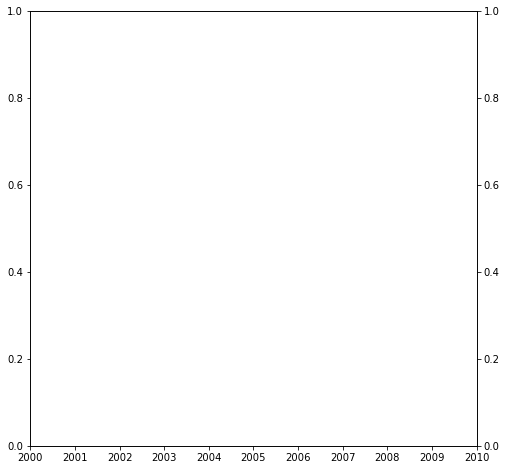

In [120]:
COLOR_INTEREST = "#308014"
COLOR_PRICE = "#3399e6"

DATE = mergeFM['DATE']
price =mergeFM['price']
#MORTGAGE15US = mergeFM['MORTGAGE15US']
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(DATE, MORTGAGE15US, color=COLOR_INTEREST)
ax2.plot(DATE, price, color=COLOR_PRICE);



ax1.set_xlabel("Date")
ax1.set_ylabel("Weekly 15-Year Mortgage Interest Rate (%)", color=COLOR_INTEREST, fontsize=14)
ax2.set_ylabel("Daily Average Reported Price ($)", color=COLOR_PRICE, fontsize=14)
fig.suptitle("MBS Price vs 15-Year Mortgage Interest Rates", fontsize=20)

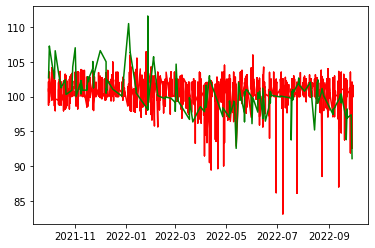

In [121]:
plt.plot(df_fn['DATE'], df_fn['price'], color='r', label='Fannie Mae')
plt.plot(df2['DATE'], df2['price'], color='g', label='Freddie Mac')

# Ginnie Mae


In [122]:
warnings.filterwarnings('ignore')
infile = '9ofkuwkebi2jixwy.csv'
tba_gm = pd.read_csv(infile)
tba_gm.head(10)

,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,sub_prd_type,trans_dt,msg_seq_nb,trc_st,cmsn_trd,remuneration,ascii_rptd_vol_tx,frmt_cd,rptd_pr,asof_cd,sale_cndtn_cd,sale_cndtn2_cd,spcl_trd_fl,diss_rptg_side_cd,side,chng_cd,rptd_high_pr,rptd_low_pr,rptd_last_pr,orig_dis_dt,orig_msg_seq_nb,function,sttl_dt,factor,rptg_party_type,contra_party_type,ATS_indicator
0,02R050614,FMCC3516075,FMCC,BBG001LK2284,20220104,16:13:06,TBA,20220128,6341,O,NaN,M,25MM+,E,110.476562,A,Z,O,NaN,NaN,S,0,0.000000,0.000000,0.000000,20220104.0,13204.0,N,20220131,0.0,D,C,NaN
1,02R050614,FMCC3516075,FMCC,BBG001LK2284,20220104,16:13:06,TBA,20220104,12506,M,NaN,M,25MM+,E,110.476562,NaN,NaN,NaN,NaN,NaN,S,7,NaN,NaN,NaN,NaN,NaN,NaN,20220131,0.0,D,C,NaN
2,02R050614,FMCC3516075,FMCC,BBG001LK2284,20220104,16:13:06,TBA,20220104,13204,O,NaN,M,25MM+,E,110.476562,NaN,Z,O,NaN,NaN,S,7,110.476562,110.476562,110.476562,20220104.0,12506.0,N,20220131,0.0,D,C,NaN
3,02R062627,FMCC3516513,FMCC,BBG001LJXN78,20220127,15:57:08,TBA,20220228,3509,O,NaN,M,25MM+,E,111.531250,A,Z,O,NaN,NaN,S,0,0.000000,0.000000,0.000000,20220218.0,5209.0,N,20220228,0.0,D,C,NaN
4,02R062627,FMCC3516513,FMCC,BBG001LJXN78,20220127,15:57:08,TBA,20220218,5209,O,NaN,M,25MM+,E,111.531250,A,Z,O,NaN,NaN,S,0,0.000000,0.000000,0.000000,20220127.0,11787.0,N,20220228,0.0,D,C,NaN
5,02R062627,FMCC3516513,FMCC,BBG001LJXN78,20220127,15:57:08,TBA,20220127,11787,M,NaN,M,25MM+,E,111.531250,NaN,NaN,O,NaN,NaN,S,7,NaN,NaN,NaN,NaN,NaN,NaN,20220228,0.0,D,C,NaN
6,02R042660,FMCC3518169,FMCC,BBG001LK62B6,20220623,12:21:00,TBA,20220630,3857,M,NaN,M,2222000,A,99.093750,A,Z,N,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,20220630,0.0,D,C,NaN
7,02R050663,FMCC3518175,FMCC,BBG001LK22H4,20220623,12:17:14,TBA,20220630,3596,M,NaN,M,4751000,A,100.750000,A,Z,N,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,20220630,0.0,D,C,NaN
8,02R042678,FMCC3518589,FMCC,BBG001LK6299,20220614,10:53:56,TBA,20220614,2790,M,NaN,M,2851347,A,99.296875,NaN,NaN,O,NaN,NaN,B,7,NaN,NaN,NaN,NaN,NaN,NaN,20220617,1.0,D,C,NaN
9,02R042678,FMCC3518589,FMCC,BBG001LK6299,20220614,10:53:56,TBA,20220614,2791,M,NaN,M,2022400,A,99.187500,NaN,NaN,O,NaN,NaN,B,3,NaN,NaN,NaN,NaN,NaN,NaN,20220617,1.0,D,C,NaN


In [123]:
tba_gm = tba_gm.loc[tba_gm['company_symbol'] == 'GNMA']
pd.set_option('display.max_columns', None)
tba_gm.head()

,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,sub_prd_type,trans_dt,msg_seq_nb,trc_st,cmsn_trd,remuneration,ascii_rptd_vol_tx,frmt_cd,rptd_pr,asof_cd,sale_cndtn_cd,sale_cndtn2_cd,spcl_trd_fl,diss_rptg_side_cd,side,chng_cd,rptd_high_pr,rptd_low_pr,rptd_last_pr,orig_dis_dt,orig_msg_seq_nb,function,sttl_dt,factor,rptg_party_type,contra_party_type,ATS_indicator
7162,01N0426C3,GNMA3515606,GNMA,BBG001LJZ4Y8,20211018,23:30:00,TBA,20211019,160,M,NaN,M,25MM+,E,110.906250,A,NaN,D,NaN,NaN,S,0,NaN,NaN,NaN,NaN,NaN,NaN,20211220,0.0,D,C,NaN
7163,01N0426C3,GNMA3515606,GNMA,BBG001LJZ4Y8,20211019,21:45:00,TBA,20211020,148,M,NaN,M,2084000,A,110.765625,A,NaN,D,NaN,NaN,S,0,NaN,NaN,NaN,NaN,NaN,NaN,20211220,0.0,D,C,NaN
7164,01N0426C3,GNMA3515606,GNMA,BBG001LJZ4Y8,20211020,7:38:13,TBA,20211020,30,M,NaN,M,2084000,A,110.765625,NaN,NaN,D,NaN,NaN,S,0,NaN,NaN,NaN,NaN,NaN,NaN,20211220,0.0,D,C,NaN
7165,01N0426C3,GNMA3515606,GNMA,BBG001LJZ4Y8,20211020,7:38:13,TBA,20211020,156,N,NaN,M,2084000,A,110.765625,NaN,NaN,D,NaN,NaN,S,0,0.0,0.0,0.0,20211020.0,30.0,C,20211220,0.0,D,C,NaN
7166,01N0426C3,GNMA3515606,GNMA,BBG001LJZ4Y8,20211029,10:39:10,TBA,20211029,2154,M,NaN,M,2000000,A,110.664062,NaN,NaN,D,NaN,NaN,S,0,NaN,NaN,NaN,NaN,NaN,NaN,20211220,0.0,D,C,NaN


In [124]:
data = tba_gm
data['Date'] = pd.to_datetime(data['trd_exctn_dt'], format="%Y%m%d")
data.sort_values('Date', inplace=True)
price_date = data['Date']
df_g = pd.DataFrame().assign(DATE=data['Date'], price=data['rptd_pr'])
print(df_g)

            DATE      price
8087  2021-09-30  111.78125
12302 2021-09-30  110.12500
8088  2021-09-30  111.78125
10781 2021-09-30  104.34375
10780 2021-09-30  104.34375
...          ...        ...
13788 2022-09-29  103.21875
13769 2022-09-29  103.00000
13791 2022-09-29  103.37500
13768 2022-09-30  101.59375
13767 2022-09-30  101.59375

[6650 rows x 2 columns]


In [125]:
df_g.reset_index(inplace=True)
df_g.head()

,index,DATE,price
0,8087,2021-09-30,111.78125
1,12302,2021-09-30,110.12500
2,8088,2021-09-30,111.78125
3,10781,2021-09-30,104.34375
4,10780,2021-09-30,104.34375


In [126]:
del df_g[df_g.columns[0]]
df_g.head()

,DATE,price
0,2021-09-30,111.78125
1,2021-09-30,110.12500
2,2021-09-30,111.78125
3,2021-09-30,104.34375
4,2021-09-30,104.34375


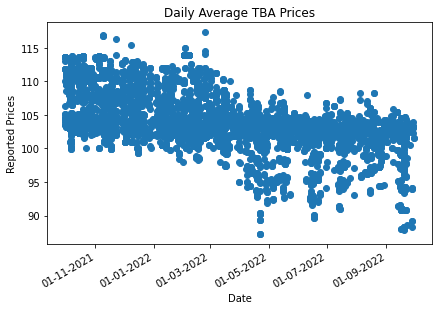

In [127]:
Date = df_g['DATE']
price = df_g['price']
plt.plot_date(Date, price)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Daily Average TBA Prices')
plt.xlabel('Date')
plt.ylabel('Reported Prices')



plt.show()

Text(0.5, 1.0, 'Daily Average TBA Prices')

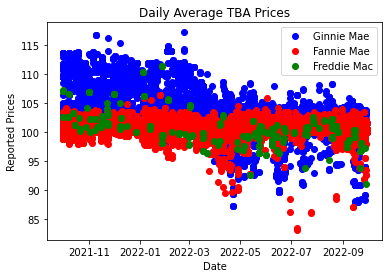

In [134]:
plt.plot(df_g['DATE'], df_g['price'], "bo",  label='Ginnie Mae')
plt.plot(df_fn['DATE'], df_fn['price'], 'ro', label='Fannie Mae')
plt.plot(df2['DATE'], df2['price'], 'go',  label='Freddie Mac')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Reported Prices")
plt.title("Daily Average TBA Prices")

In [178]:
merge30gm = pd.merge_asof(df_g, mtg30)

mtg30["DATE"] = pd.to_datetime(mtg30["DATE"])

merge30gm.head(10)

,DATE,price,MORTGAGE30US
0,2021-09-30,111.781250,3.01
1,2021-09-30,110.125000,3.01
2,2021-09-30,111.781250,3.01
3,2021-09-30,104.343750,3.01
4,2021-09-30,104.343750,3.01
5,2021-09-30,104.343750,3.01
6,2021-09-30,104.343750,3.01
7,2021-09-30,106.375000,3.01
8,2021-09-30,105.121093,3.01
9,2021-09-30,105.121093,3.01


Text(0.5, 0.98, 'Ginnie Mae MBS Price vs 30-Year Mortgage Interest Rates')

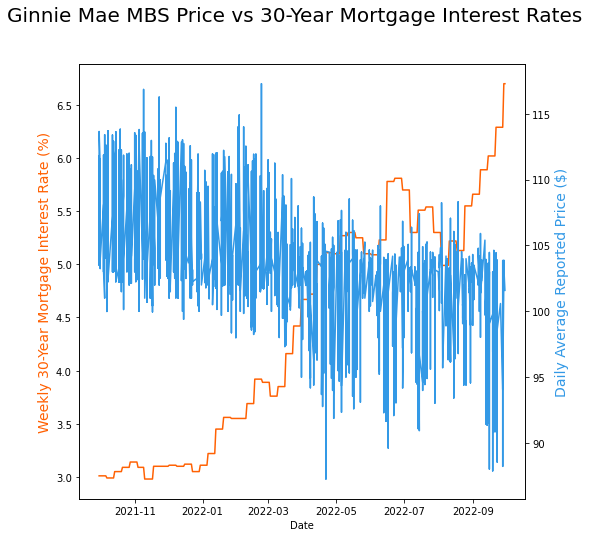

In [180]:
COLOR_INTEREST = "#FF6103"
COLOR_PRICE = "#3399e6"

DATE = merge30gm['DATE']
price = merge30gm['price']
MORTGAGE30US = merge30gm['MORTGAGE30US']
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(DATE, MORTGAGE30US, color=COLOR_INTEREST)
ax2.plot(DATE, price, color=COLOR_PRICE);

ax1.set_xlabel("Date")
ax1.set_ylabel("Weekly 30-Year Mortgage Interest Rate (%)", color=COLOR_INTEREST, fontsize=14)
ax2.set_ylabel("Daily Average Reported Price ($)", color=COLOR_PRICE, fontsize=14)
fig.suptitle("Ginnie Mae MBS Price vs 30-Year Mortgage Interest Rates", fontsize=20)

# New Housing Construction
## New Privately-Owned Housing Units Started: Total Units

In [246]:
warnings.filterwarnings('ignore')
infile = 'HOUST.csv'
House = pd.read_csv(infile)
House.head(10)

,DATE,HOUST
0,2021-09-01,1559.0
1,2021-10-01,1563.0
2,2021-11-01,1706.0
3,2021-12-01,1768.0
4,2022-01-01,1666.0
5,2022-02-01,1777.0
6,2022-03-01,1716.0
7,2022-04-01,1805.0
8,2022-05-01,1562.0
9,2022-06-01,1575.0


In [256]:
data["DATE"] = pd.to_datetime(House["DATE"])
df_h = pd.DataFrame().assign(DATE=House['DATE'], quantity=House['HOUST'])
print(df_h)

          DATE  quantity
0   2021-09-01    1559.0
1   2021-10-01    1563.0
2   2021-11-01    1706.0
3   2021-12-01    1768.0
4   2022-01-01    1666.0
5   2022-02-01    1777.0
6   2022-03-01    1716.0
7   2022-04-01    1805.0
8   2022-05-01    1562.0
9   2022-06-01    1575.0
10  2022-07-01    1377.0
11  2022-08-01    1508.0
12  2022-09-01    1465.0
13  2022-10-01    1434.0
14  2022-11-01    1427.0


In [260]:
df2.tail(10000)

,DATE,price
725225,2022-09-29,99.699218
1308233,2022-09-29,87.390625
1079628,2022-09-29,93.089843
1308231,2022-09-29,87.390625
742817,2022-09-29,94.781250
...,...,...
894340,2022-09-30,90.498046
894341,2022-09-30,90.554687
894342,2022-09-30,90.519531
894328,2022-09-30,90.570312


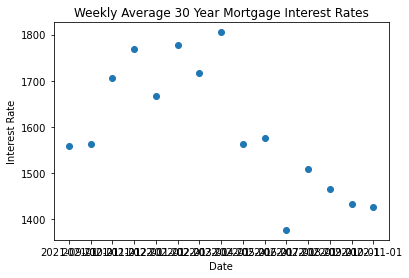

In [248]:
Date = House['DATE']
mtg = House['HOUST']
plt.plot_date(Date, mtg)

plt.title('Weekly Average 30 Year Mortgage Interest Rates')
plt.xlabel('Date')
plt.ylabel('Interest Rate')



plt.show()

In [279]:

merge30h = pd.concat([df, df_h])
#pd.merge(df2, df_h, how = 'outer', on = 'DATE')

In [280]:
#merge30h.reset_index(drop=True)
print(merge30h)

                   DATE       price  quantity
0   2021-09-30 00:00:00  102.434092       NaN
1   2021-10-01 00:00:00  102.507786       NaN
2   2021-10-03 00:00:00  102.292969       NaN
3   2021-10-04 00:00:00  102.520522       NaN
4   2021-10-05 00:00:00  102.535979       NaN
..                  ...         ...       ...
10           2022-07-01         NaN    1377.0
11           2022-08-01         NaN    1508.0
12           2022-09-01         NaN    1465.0
13           2022-10-01         NaN    1434.0
14           2022-11-01         NaN    1427.0

[308 rows x 3 columns]


Text(0.5, 0.98, 'New Privately-Owned Housing vs Daily Average Reported MBS Price')

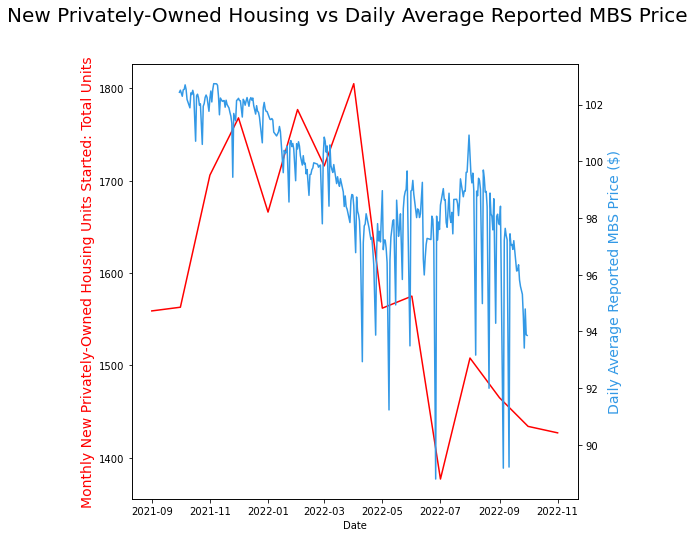

In [305]:
COLOR_INTEREST = "r"
COLOR_PRICE = "#3399e6"

DATE = merge30h['DATE']
price = merge30h['price']
quantity = merge30h['quantity']
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(DATE, quantity, color=COLOR_INTEREST,  label= 'New Housing')
ax2.plot(DATE, price, color=COLOR_PRICE,  label= 'Daily Average MBS Price');

ax1.set_xlabel("Date")
ax1.set_ylabel("Monthly New Privately-Owned Housing Units Started: Total Units", color=COLOR_INTEREST, fontsize=14)
ax2.set_ylabel("Daily Average Reported MBS Price ($)", color=COLOR_PRICE, fontsize=14)
fig.suptitle("New Privately-Owned Housing vs Daily Average Reported MBS Price", fontsize=20)

In [242]:

merge30h.dropna(subset=['price'],inplace=True)
print(merge30h)

                        DATE       price  quantity
722398   2021-09-30 00:00:00  111.710937       NaN
1847005  2021-09-30 00:00:00  100.078125       NaN
1847004  2021-09-30 00:00:00  100.074218       NaN
1847003  2021-09-30 00:00:00  100.062500       NaN
1847002  2021-09-30 00:00:00  100.062500       NaN
...                      ...         ...       ...
894340   2022-09-30 00:00:00   90.498046       NaN
894341   2022-09-30 00:00:00   90.554687       NaN
894342   2022-09-30 00:00:00   90.519531       NaN
894328   2022-09-30 00:00:00   90.570312       NaN
913018   2022-09-30 00:00:00   96.773437       NaN

[1982699 rows x 3 columns]


Text(0.5, 1.0, 'New Privately-Owned Housing Units Started: Total Units')

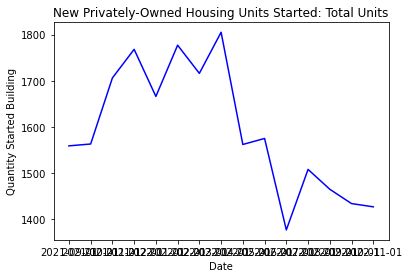

In [245]:
plt.plot(df_h['DATE'], df_h['quantity'], "b",  label='New Construction')

#plt.plot(mtg30['DATE'], mtg30['MORTGAGE30US'])
plt.xlabel("Date")
plt.ylabel("Quantity Started Building")
plt.title("New Privately-Owned Housing Units Started: Total Units")

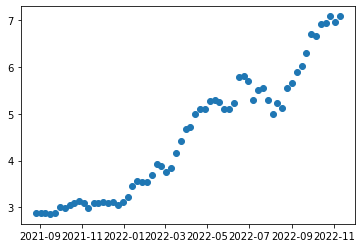

In [212]:
Date = mtg30['DATE']
mtg = mtg30['MORTGAGE30US']
plt.plot_date(Date, mtg)

In [284]:
merge30hmtg = pd.concat([mtg30, df_h])

In [285]:
print(merge30hmtg)

                   DATE  MORTGAGE30US  quantity
3   2021-08-26 00:00:00          2.87       NaN
4   2021-09-02 00:00:00          2.87       NaN
5   2021-09-09 00:00:00          2.88       NaN
6   2021-09-16 00:00:00          2.86       NaN
7   2021-09-23 00:00:00          2.88       NaN
..                  ...           ...       ...
10           2022-07-01           NaN    1377.0
11           2022-08-01           NaN    1508.0
12           2022-09-01           NaN    1465.0
13           2022-10-01           NaN    1434.0
14           2022-11-01           NaN    1427.0

[79 rows x 3 columns]


Text(0.5, 0.98, 'New Privately-Owned Housing vs 30-Year Mortgage Interest Rate')

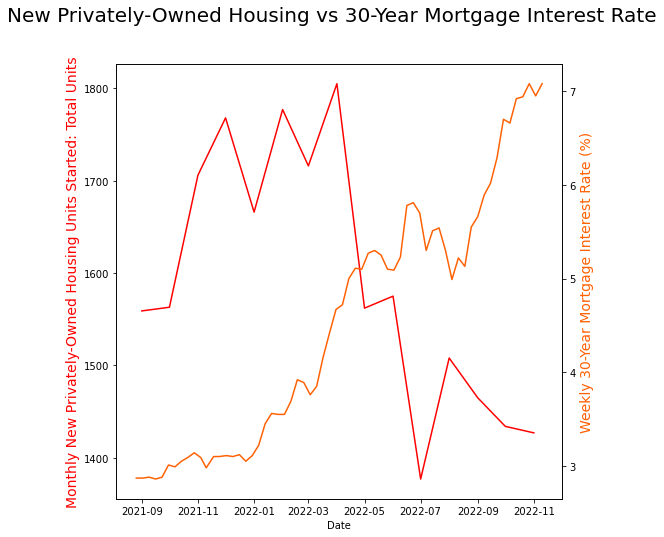

In [300]:
COLOR_INTEREST = "r"
COLOR_PRICE = "#FF6103"

DATE = merge30hmtg['DATE']
price = merge30hmtg['MORTGAGE30US']
quantity = merge30hmtg['quantity']
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(DATE, quantity, color=COLOR_INTEREST)
ax2.plot(DATE, price, color=COLOR_PRICE);

ax1.set_xlabel("Date")
ax1.set_ylabel("Monthly New Privately-Owned Housing Units Started: Total Units", color=COLOR_INTEREST, fontsize=14)
ax2.set_ylabel("Weekly 30-Year Mortgage Interest Rate (%)", color=COLOR_PRICE, fontsize=14)
fig.suptitle("New Privately-Owned Housing vs 30-Year Mortgage Interest Rate", fontsize=20)

In [291]:
merge15hmtg = pd.concat([mtg15, df_h])

Text(0.5, 0.98, 'New Privately-Owned Housing vs 15-Year Mortgage Interest Rates')

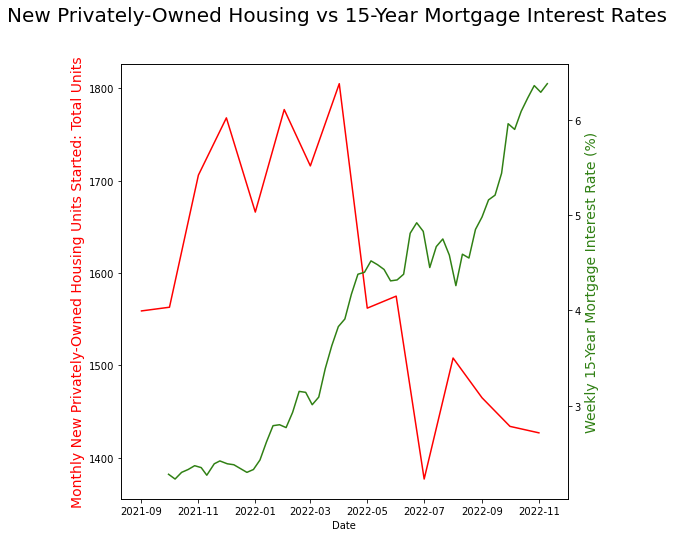

In [301]:
COLOR_INTEREST = "r"
COLOR_PRICE = "#308014"

DATE = merge15hmtg['DATE']
price = merge15hmtg['MORTGAGE15US']
quantity = merge15hmtg['quantity']
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(DATE, quantity, color=COLOR_INTEREST)
ax2.plot(DATE, price, color=COLOR_PRICE);



ax1.set_xlabel("Date")
ax1.set_ylabel("Monthly New Privately-Owned Housing Units Started: Total Units", color=COLOR_INTEREST, fontsize=14)
ax2.set_ylabel("Weekly 15-Year Mortgage Interest Rate (%)", color=COLOR_PRICE, fontsize=14)
fig.suptitle("New Privately-Owned Housing vs 15-Year Mortgage Interest Rates", fontsize=20)